# Computing eigenvector standards
Tim Tyree<br>
5.15.2020

In [4]:
#preamble for dev ipynb

#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

#use cuda via numba
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
from lib import *
#%autocall 1
%load_ext autoreload
%autoreload 2


#nota bene: you can increase the ram allocated to the virtual machine running jupyter with 
#$ jupyter notebook --NotebookApp.max_buffer_size=your_value

# import data for northern plains

In [1]:
# state = 'IA'
# data_dir = 'Data'
# filename='STAT_%s.pickle'%state
# command="curl https://mas-dse-open.s3.amazonaws.com/Weather/by_state_2/%s.gz > %s/%s.gz"%(filename,data_dir,filename)
# print(command)
# !$command

# command="gunzip %s/%s.gz"%(data_dir,filename)
# print(command)
# !$command

In [ ]:
data_dir = '../DataHW3'

In [27]:
df, keys = pd.read_pickle(f'Data/{filename}')


In [29]:
keys

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

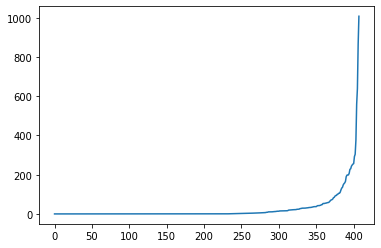

In [41]:
plt.plot(df['SNWD_s20']['SortedVals'])

# 